<a href="https://colab.research.google.com/github/dimasw09/BelajarKoding/blob/main/PrediksiKelulusan3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

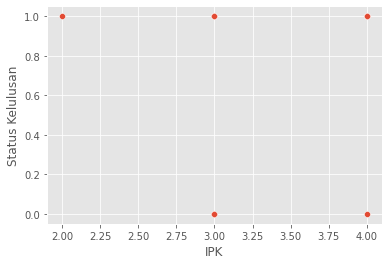

In [74]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


dataset_url = ('https://raw.githubusercontent.com/dimasw09/BelajarKoding/main/Dataset1.csv')

d = pd.read_csv(dataset_url)
# d.head(170)
sns.scatterplot(x=d['IPK'],y=d['Status Kelulusan'])

In [52]:
d.columns

Index(['Tahun Masuk', 'IPK', 'SKS', 'Status Kelulusan'], dtype='object')

In [53]:
x=d.iloc[:,0:-1]
y=d.iloc[:,2].values

In [54]:
#Import Module
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
test_X = sc.fit_transform(test_X)
test_y = sc.fit_transform(test_y.reshape(-1,1))
# print(test_X)
# print(test_y)

In [57]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=5,activation='relu'))
model.add(tf.keras.layers.Dense(units=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(test_X,test_y.reshape(-1,1),epochs=10,batch_size=30)

model.summary()

Epoch 1/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7573
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.7556
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7540
Epoch 4/10
2/2 [==============================] - 0s 5ms/step - loss: 0.7524
Epoch 5/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7508
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7492
Epoch 7/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7475
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7459
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7443
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7426
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 20        
         

In [58]:
ypredict=model.predict(test_X)


2/2 [==============================] - 0s 5ms/step


In [59]:
from sklearn.metrics import mean_absolute_error
accuracy=mean_absolute_error(ypredict,test_y)
print(accuracy)

0.74124543516653


<Figure size 432x288 with 0 Axes>

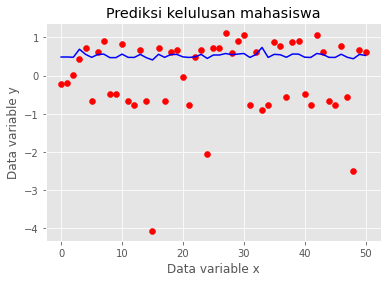

<Figure size 432x288 with 0 Axes>

In [60]:
a=range(len(test_X))
plt.scatter(a,test_y, color='red')
plt.plot(a,ypredict, color='blue')
plt.title('Prediksi kelulusan mahasiswa')
plt.xlabel('Data variable x')
plt.ylabel('Data variable y')
# plt.plot(x,ypredict)
plt.figure()

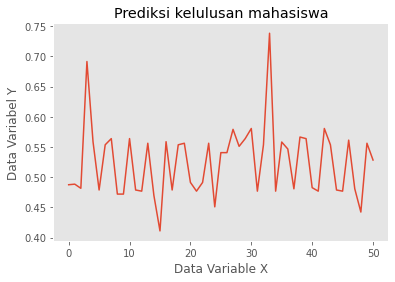

In [61]:
plt.plot(a,ypredict)

plt.xlabel('Data Variable X')
plt.ylabel('Data Variabel Y')

plt.title('Prediksi kelulusan mahasiswa')
plt.grid(False)

plt.show()

KeyError: ignored